In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Load the Boston Housing dataset (for demonstration purposes)
df = pd.read_csv('datasets/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# build a formular api model using price as the target, the rest of the variables as predictors
model = smf.ols('price ~ area + bedrooms + bathrooms + stories + mainroad + guestroom + basement + hotwaterheating + airconditioning + parking + prefarea + furnishingstatus', data=df)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          9.07e-123
Time:                        08:46:02   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [5]:
# ------------------------------------------
# 1. Identifying Outliers (using studentized residuals)
# ------------------------------------------
# Outliers can be detected using studentized residuals
outliers_studentized = model.get_influence().resid_studentized_external
outlier_threshold = 3  # Common threshold for studentized residuals

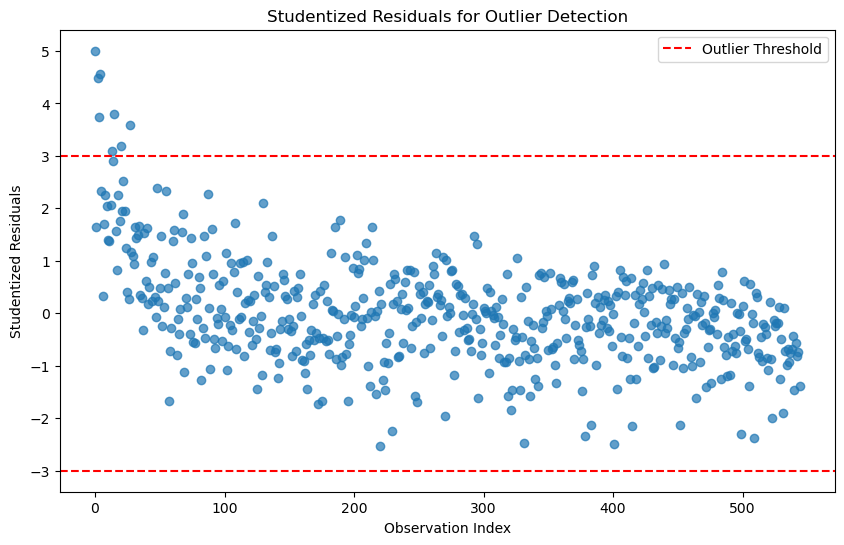

In [6]:
# Plot studentized residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(outliers_studentized)), outliers_studentized, alpha=0.7)
plt.axhline(y=outlier_threshold, color='r', linestyle='--', label='Outlier Threshold')
plt.axhline(y=-outlier_threshold, color='r', linestyle='--')
plt.title('Studentized Residuals for Outlier Detection')
plt.xlabel('Observation Index')
plt.ylabel('Studentized Residuals')
plt.legend()
plt.show()

In [7]:
# Identify observations with high studentized residuals
outlier_indices_studentized = np.where(np.abs(outliers_studentized) > outlier_threshold)[0]
print(f"Outliers detected at indices: {outlier_indices_studentized}")

Outliers detected at indices: [ 0  2  3  4 13 15 20 27]


In [8]:
# ------------------------------------------
# 1. Identifying Outliers (using standardized residuals)
# ------------------------------------------
# Outliers can be detected using standardized  residuals
outliers_standardized = model.get_influence().resid_studentized_internal
outlier_threshold = 3  # Common threshold for standardized residuals

In [9]:
# Identify observations with high standardized residuals
outlier_indices_standardized = np.where(np.abs(outliers_standardized) > outlier_threshold)[0]
print(f"Outliers detected at indices: {outlier_indices_standardized}")

Outliers detected at indices: [ 0  2  3  4 13 15 20 27]


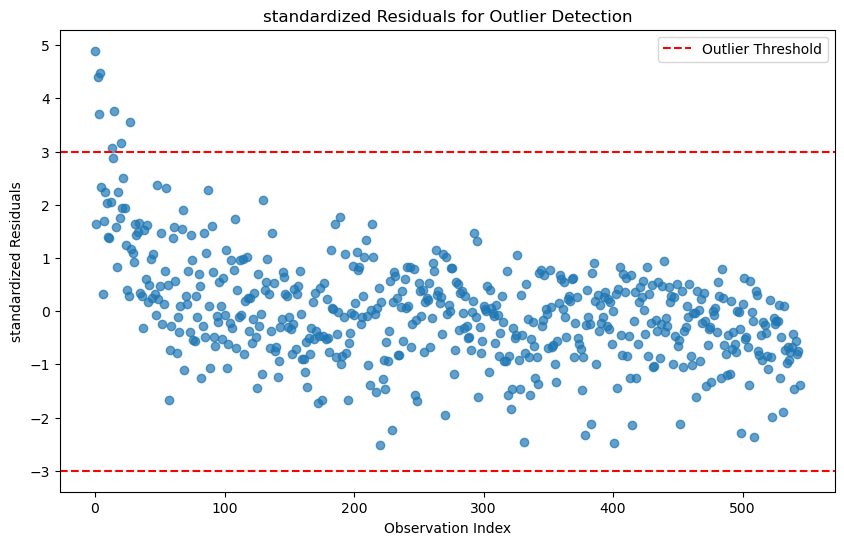

In [10]:
# Plot studentized residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(outliers_standardized)), outliers_standardized, alpha=0.7)
plt.axhline(y=outlier_threshold, color='r', linestyle='--', label='Outlier Threshold')
plt.axhline(y=-outlier_threshold, color='r', linestyle='--')
plt.title('standardized Residuals for Outlier Detection')
plt.xlabel('Observation Index')
plt.ylabel('standardized Residuals')
plt.legend()
plt.show()

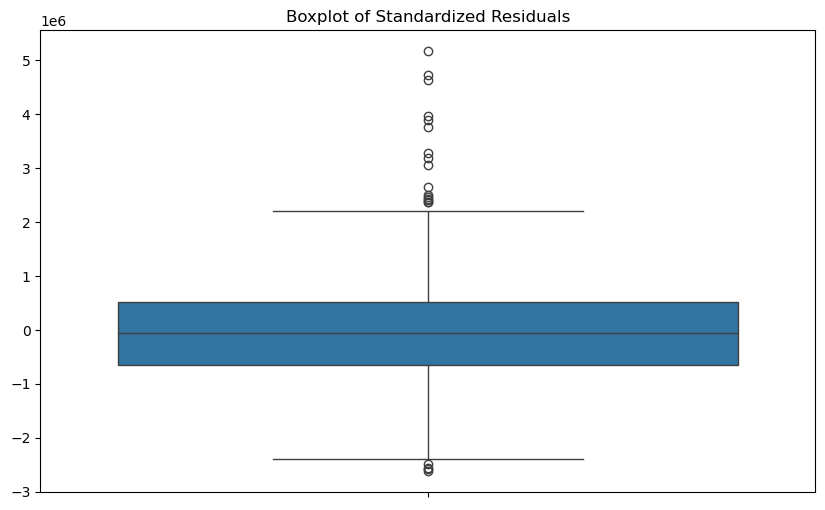

In [ ]:
# ------------------------------------------
# 1. Identifying Outliers (using boxplot)
# ------------------------------------------
# Outliers can be detected using boxplot of standardized residuals
plt.figure(figsize=(10, 6))
sns.boxplot(model.resid)
plt.title('Boxplot of Standardized Residuals');

In [34]:
# use 3 standard deviation rule to identify outliers
outlier_indices = np.where(np.abs(model.resid) > 3 * model.resid.std())[0]
print(f"Outliers detected at indices: {outlier_indices}")

Outliers detected at indices: [ 0  2  3  4 13 15 20 27]


In [11]:
# ------------------------------------------
# 2. Identifying High Leverage Points
# ------------------------------------------
# High leverage points can be detected using the hat matrix (leverage values)
leverage = model.get_influence().hat_matrix_diag
leverage_threshold = 2 * (df.shape[1] / df.shape[0])  # Common threshold for leverage

#### Identifying High Leverage Points

A common threshold for identifying **high leverage points** in regression analysis is:


$h_i > \frac{2p}{n}$

where:  
- $h_i$ is the leverage value for the \( i \)-th observation,  
-  $p$ is the number of predictors (including the intercept), and  
- $n$ is the total number of observations.


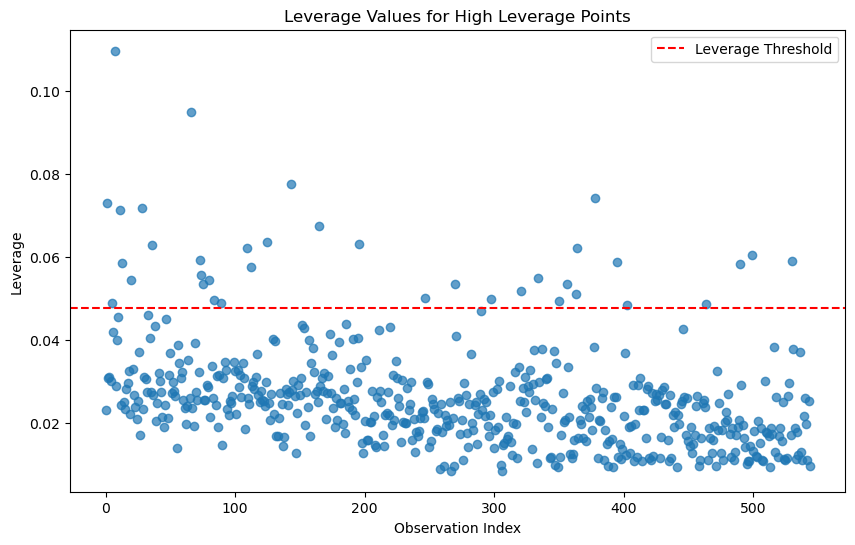

In [12]:
# Plot leverage values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(leverage)), leverage, alpha=0.7)
plt.axhline(y=leverage_threshold, color='r', linestyle='--', label='Leverage Threshold')
plt.title('Leverage Values for High Leverage Points')
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.legend()
plt.show()

In [13]:
# Identify observations with high leverage
high_leverage_indices = np.where(leverage > leverage_threshold)[0]
print(f"High leverage points detected at indices: {high_leverage_indices}")

High leverage points detected at indices: [  1   5   7  11  13  20  28  36  66  73  74  75  80  84  89 109 112 125
 143 165 196 247 270 298 321 334 350 356 363 364 378 395 403 464 490 499
 530]


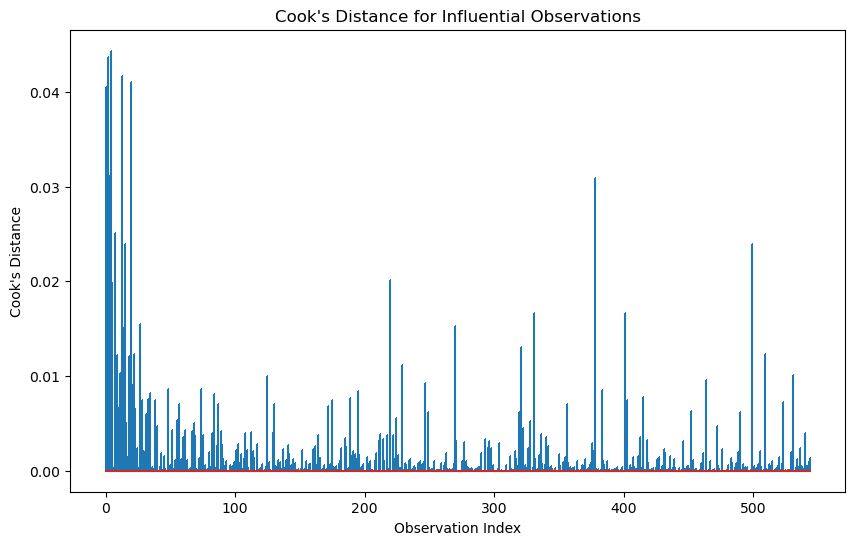

In [14]:
# ------------------------------------------
# 3. Cook's Distance for Influential Observations
# ------------------------------------------
# Cook's distance measures the influence of each observation on the model
cooks_distance = model.get_influence().cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(range(len(cooks_distance)), cooks_distance, markerfmt=",")
plt.title("Cook's Distance for Influential Observations")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()

Cook’s distance is considered high if it is greater than 0.5 and extreme if it is greater than 1.

In [15]:
# Identify influential observations
influential_threshold = 4 / (df.shape[1] - 1 ) # Common threshold for Cook's distance
influential_indices = np.where(cooks_distance > influential_threshold)[0]
print(f"Influential observations detected at indices: {influential_indices}")

Influential observations detected at indices: []


In [16]:
# =======================================
# 4. Checking Multicollinearity (VIF)
# =======================================
# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]

# one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True, dtype=float)


vif_data = calculate_vif(X)
print("\nVariance Inflation Factors:")
print(vif_data.sort_values('VIF', ascending=False))


Variance Inflation Factors:
                           Variable        VIF
1                          bedrooms  16.652387
2                         bathrooms   9.417643
0                              area   8.276447
3                           stories   7.880730
5                      mainroad_yes   6.884806
11  furnishingstatus_semi-furnished   2.386831
7                      basement_yes   2.019858
12     furnishingstatus_unfurnished   2.008632
4                           parking   1.986400
9               airconditioning_yes   1.767753
10                     prefarea_yes   1.494211
6                     guestroom_yes   1.473234
8               hotwaterheating_yes   1.091568


In [17]:
# Rule of thumb: VIF > 10 indicates significant multicollinearity
multicollinear_features = vif_data[vif_data['VIF'] > 10]['Variable']
print(f"Features with significant multicollinearity: {multicollinear_features.tolist()}")

Features with significant multicollinearity: ['bedrooms']


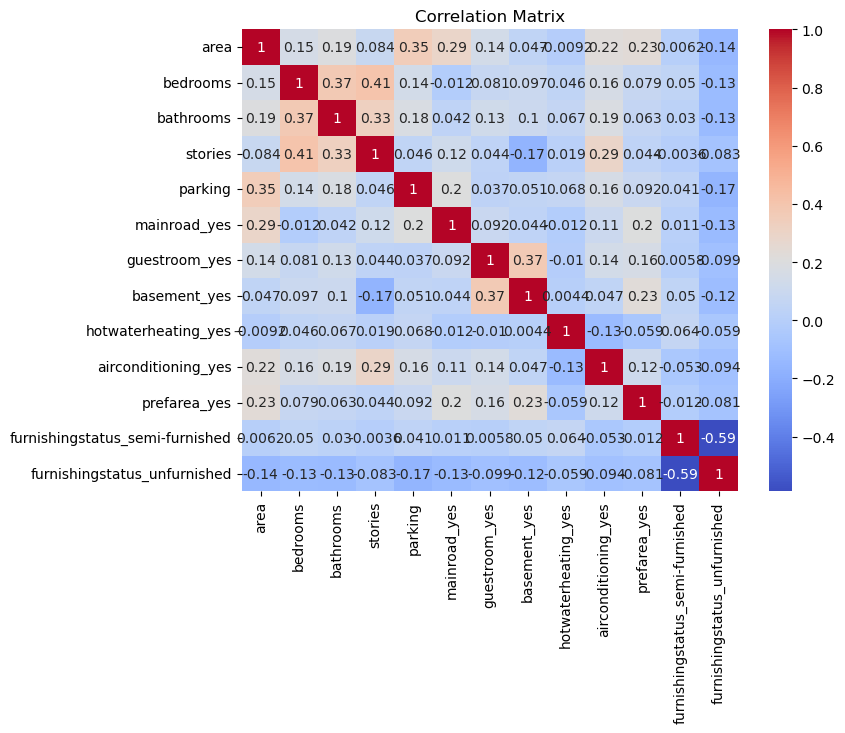

In [23]:
# =======================================
# 4. Checking Multicollinearity (Correlation Matrix)
# =======================================
# Correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix');


In [25]:
#output the correlation of other predictors with the bedrooms
X.corr()['bedrooms'].abs().sort_values(ascending=False)

bedrooms                           1.000000
stories                            0.408564
bathrooms                          0.373930
airconditioning_yes                0.160603
area                               0.151858
parking                            0.139270
furnishingstatus_unfurnished       0.126252
basement_yes                       0.097312
guestroom_yes                      0.080549
prefarea_yes                       0.079023
furnishingstatus_semi-furnished    0.050040
hotwaterheating_yes                0.046049
mainroad_yes                       0.012033
Name: bedrooms, dtype: float64

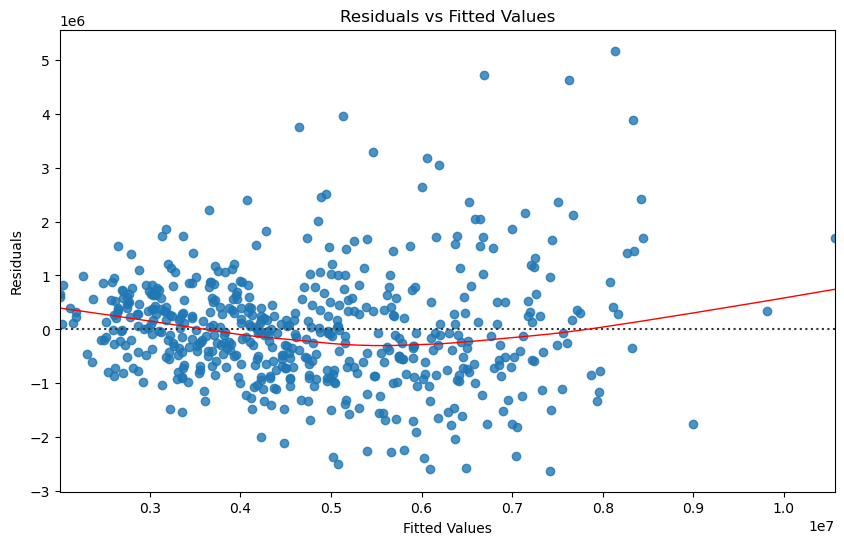

<Figure size 1000x600 with 0 Axes>

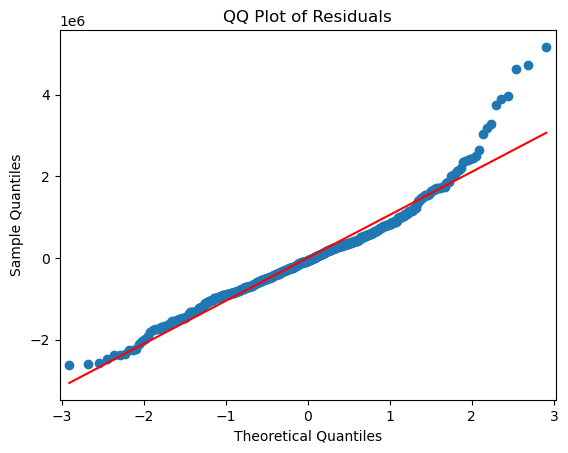

In [29]:
# ------------------------------------------
# 5. Analyzing Residual Patterns
# ------------------------------------------
# Residuals vs Fitted Values Plot
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals');

# QQ Plot for Normality of Residuals
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals');


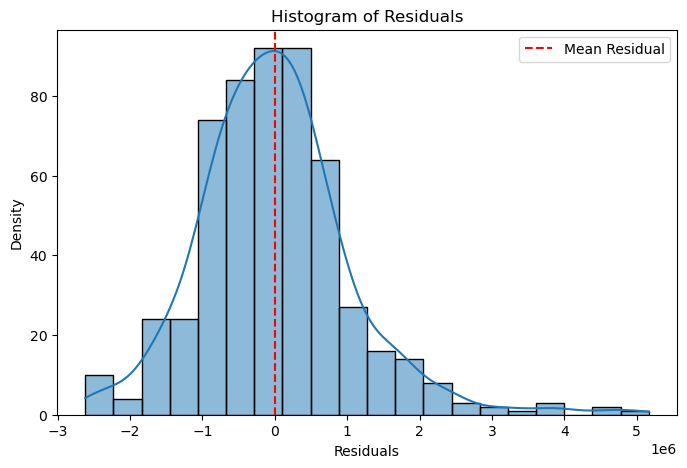

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20)
plt.axvline(residuals.mean(), color='red', linestyle='--', label="Mean Residual")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals")
plt.legend()
plt.show()